In [133]:
!python --version

import warnings
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import fbprophet

Python 3.8.5


In [134]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [135]:
df = pd.read_csv(r'D:\Capstone\RTX_LD\combineddf q1-q4.csv')

In [136]:
df

,date,hour,report,region,type,participant,resource,mw
0,1/1/2019,1,RTX,LUZON,LD,WESMTMP,1ANGAT_T5L1,0.0
1,1/1/2019,1,RTX,LUZON,LD,WESM,1BALNEO_L01,50.4
2,1/1/2019,1,RTX,LUZON,LD,LUELCO,1BAUAN_T1L2,0.0
3,1/1/2019,1,RTX,LUZON,LD,WESM,1BINGA_T1L1,0.0
4,1/1/2019,1,RTX,LUZON,LD,WESM,1BOTOL_T1L2,13.8
...,...,...,...,...,...,...,...,...
2264431,2019-12-31,24,RTX,LUZON,LD,WESMTMP,3MLAYA_T2L2,44.6
2264432,2019-12-31,24,RTX,LUZON,LD,WESM,3NAG_CSRC2B,9.6
2264433,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS1,0.0
2264434,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS4,0.0


In [137]:
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d',infer_datetime_format=True)

In [138]:
DF_2PACO_T1L1 = df[df['resource'] == '2PACO_T1L1']

In [139]:
DF_2PACO_T1L1

,date,hour,report,region,type,participant,resource,mw
138,2019-01-01,5,RTX,LUZON,LD,MERALCO,2PACO_T1L1,226.9
251,2019-01-01,9,RTX,LUZON,LD,MERALCO,2PACO_T1L1,232.8
592,2019-01-01,20,RTX,LUZON,LD,MERALCO,2PACO_T1L1,289.5
623,2019-01-01,21,RTX,LUZON,LD,MERALCO,2PACO_T1L1,290.8
842,2019-01-02,4,RTX,LUZON,LD,MERALCO,2PACO_T1L1,237.3
...,...,...,...,...,...,...,...,...
2263513,2019-12-30,21,RTX,LUZON,LD,MERALCO,2PACO_T1L1,348.8
2263825,2019-12-31,6,RTX,LUZON,LD,MERALCO,2PACO_T1L1,267.5
2264033,2019-12-31,12,RTX,LUZON,LD,MERALCO,2PACO_T1L1,333.6
2264215,2019-12-31,18,RTX,LUZON,LD,MERALCO,2PACO_T1L1,333.8


In [140]:
Daily2PACO_T1L1 = DF_2PACO_T1L1.groupby('date')['mw'].agg('sum')
Daily2PACO_T1L1

date
2019-01-01    6256.5
2019-01-02    7839.0
2019-01-03    9231.9
2019-01-04    9584.4
2019-01-05    9251.2
               ...  
2019-12-27    8849.4
2019-12-28    8662.3
2019-12-29    7567.3
2019-12-30    7783.9
2019-12-31    7326.6
Name: mw, Length: 365, dtype: float64

In [141]:
Daily2PACO_T1L1 = Daily2PACO_T1L1.reset_index()
Daily2PACO_T1L1

,date,mw
0,2019-01-01,6256.5
1,2019-01-02,7839.0
2,2019-01-03,9231.9
3,2019-01-04,9584.4
4,2019-01-05,9251.2
...,...,...
360,2019-12-27,8849.4
361,2019-12-28,8662.3
362,2019-12-29,7567.3
363,2019-12-30,7783.9


In [143]:
Daily2PACO_T1L1.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
          ds          yhat    yhat_lower    yhat_upper
0 2019-01-01   9663.343791   8574.650109  10725.074199
1 2019-02-01  10274.519578   9058.057053  11454.220329
2 2019-03-01  10815.166173   9726.139121  11943.977363
3 2019-04-01  11317.980600  10114.032053  12480.151148
4 2019-05-01  11770.702612  10582.776462  12984.840225


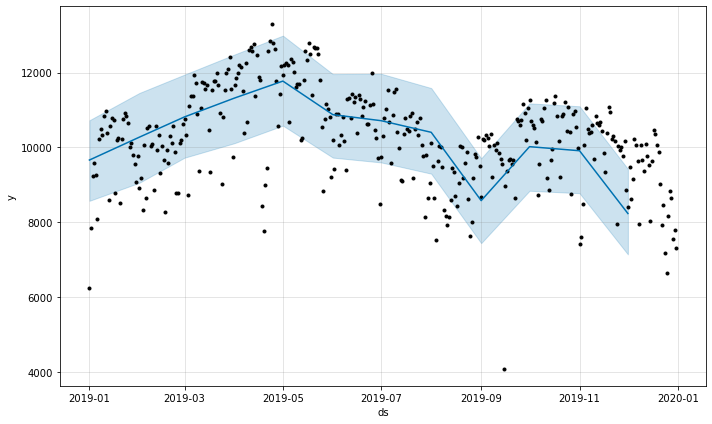

In [144]:
# define the model
model = Prophet(daily_seasonality=True)
# fit the model
model.fit(Daily2PACO_T1L1)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2019-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds         yhat   yhat_lower    yhat_upper
0 2020-01-01  9732.536826  8686.577287  10965.941099
1 2020-02-01  9032.670612  7887.964642  10178.804335
2 2020-03-01  7766.808196  6599.177635   8876.389526
3 2020-04-01  9263.292946  8019.679224  10437.475888
4 2020-05-01  8973.093104  7680.562154  10312.067090


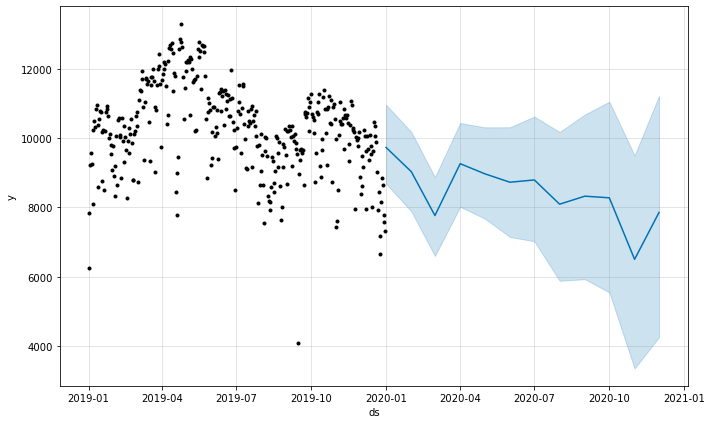

In [145]:
future = list()
for i in range(1, 13):
	date = '2020-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [148]:
Daily2PACO_T1L1

,ds,y
0,2019-01-01,6256.5
1,2019-01-02,7839.0
2,2019-01-03,9231.9
3,2019-01-04,9584.4
4,2019-01-05,9251.2
...,...,...
360,2019-12-27,8849.4
361,2019-12-28,8662.3
362,2019-12-29,7567.3
363,2019-12-30,7783.9


In [173]:
train = Daily2PACO_T1L1.iloc[:-60]
print(train.tail())

            ds        y
300 2019-10-28  10888.8
301 2019-10-29  10981.9
302 2019-10-30  10557.5
303 2019-10-31   9972.9
304 2019-11-01   7427.8


In [174]:
train

,ds,y
0,2019-01-01,6256.5
1,2019-01-02,7839.0
2,2019-01-03,9231.9
3,2019-01-04,9584.4
4,2019-01-05,9251.2
...,...,...
300,2019-10-28,10888.8
301,2019-10-29,10981.9
302,2019-10-30,10557.5
303,2019-10-31,9972.9


In [175]:
from sklearn.metrics import mean_absolute_error

In [176]:
y_true = train['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1920.726


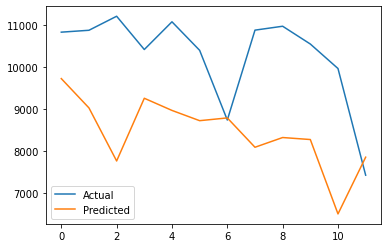

In [177]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [105]:
# train = Daily2PACO_T1L1.drop(df.index[-12:])
# print(train.tail())

In [106]:
# Daily2PACO_T1L1 = Daily2PACO_T1L1.reset_index()

In [107]:
# Daily2PACO_T1L1

In [108]:
# from fbprophet import Prophet
# model = Prophet()

In [109]:
# Daily2PACO_T1L1

In [110]:
#Daily2PACO_T1L1.columns = ['ds', 'y']

In [111]:
#Daily2PACO_T1L1

In [112]:
#model.fit(Daily2PACO_T1L1)

In [113]:
#Daily2PACO_T1L1

In [114]:
# future = list()
# for i in range(1, 15):
# 	date = '2019-%02d' % i
# 	future.append([date])

In [115]:
# future

In [116]:
# future = pd.DataFrame(future)
# future.columns = ['ds']
# future['ds']= pd.to_datetime(future['ds'])

In [117]:
#forecast = model.predict(future)

In [118]:
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])